In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [ ]:
#Show the dataframe shape.

In [3]:
len(data)

10910

In [ ]:
#Standardize header names.

In [5]:
data.columns = [column.lower() for column in data.columns] 
data.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [ ]:
#Which columns are numerical?

In [6]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)
X_num

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
X_cat

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [ ]:
#Check and deal with NaN values.

In [9]:
data.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [66]:
data = data.dropna()
data.isna().sum()

unnamed: 0                       0
customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [ ]:
#Show DataFrame info.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     4543 non-null   int64  
 1   customer                       4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer lifetime value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective to date              4543 non-null   object 
 8   employmentstatus               4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location code                  4543 non-null   object 
 12  marital status                 4543 non-null   

In [ ]:
#Describe DataFrame.

In [68]:
data.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,5540.241250,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,3149.146534,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,2.000000,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2884.000000,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5549.000000,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8283.000000,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,10908.000000,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [69]:
data['response'].value_counts()

No     3902
Yes     641
Name: response, dtype: int64

<AxesSubplot:>

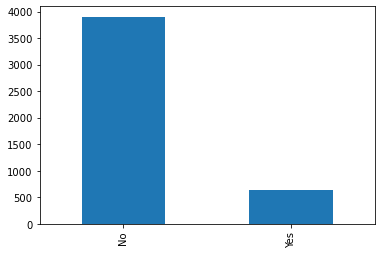

In [70]:
data['response'].value_counts().plot(kind='bar')

In [ ]:
#Show a plot of the response rate by the sales channel.

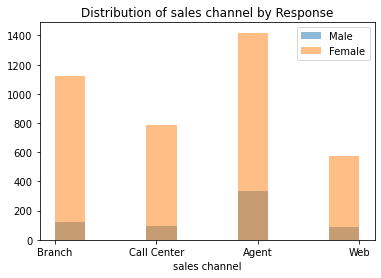

In [71]:
plt.hist('sales channel', data=data[data['response'] == 'Yes'], alpha=0.5, label='Male');
plt.hist('sales channel', data=data[data['response'] == 'No'], alpha=0.5, label='Female');
plt.title('Distribution of sales channel by Response');
plt.xlabel('sales channel');
plt.legend();

In [ ]:
#Show a plot of the response rate by the total claim amount.

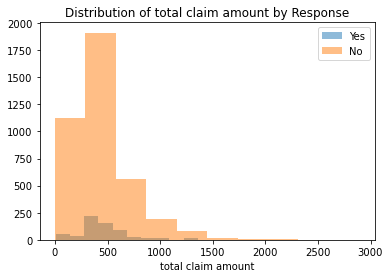

In [72]:
plt.hist('total claim amount', data=data[data['response'] == 'Yes'], alpha=0.5, label='Yes');
plt.hist('total claim amount', data=data[data['response'] == 'No'], alpha=0.5, label='No');
plt.title('Distribution of total claim amount by Response');
plt.xlabel('total claim amount');
plt.legend();

In [ ]:
#Show a plot of the response rate by income.

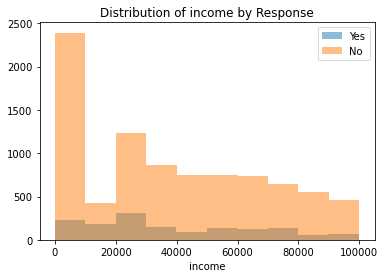

In [20]:
plt.hist('income', data=data[data['response'] == 'Yes'], alpha=0.5, label='Yes');
plt.hist('income', data=data[data['response'] == 'No'], alpha=0.5, label='No');
plt.title('Distribution of income by Response');
plt.xlabel('income');
plt.legend();

In [ ]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [73]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)
X_num

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...
10902,10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929


In [74]:
X_cat

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [ ]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution

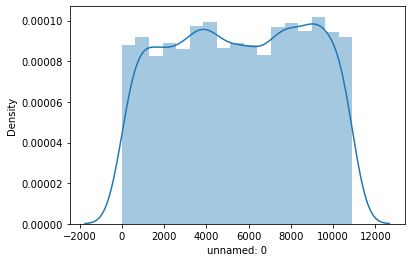

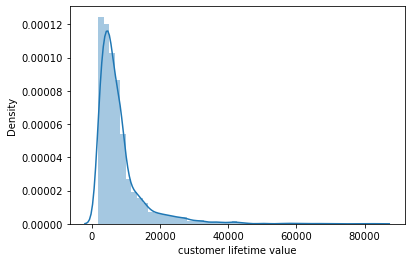

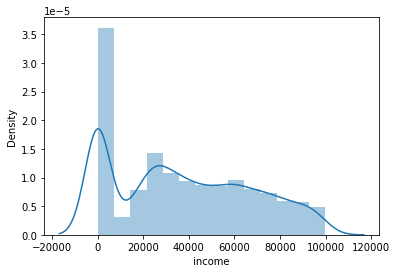

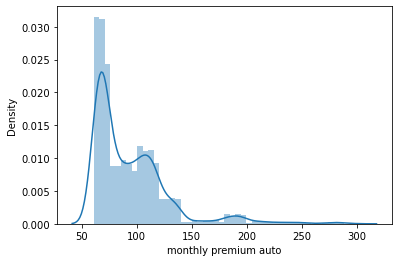

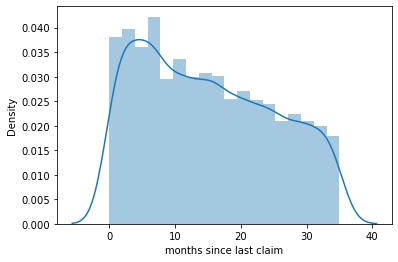

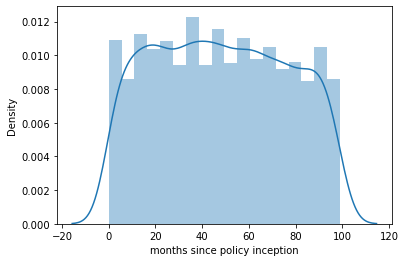

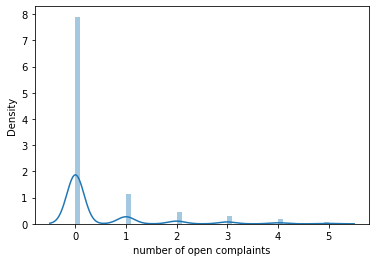

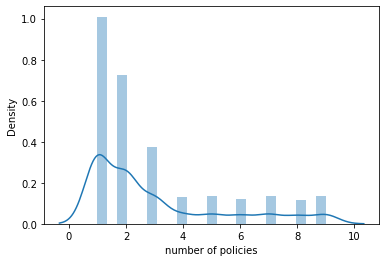

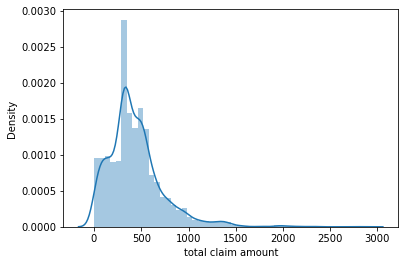

In [75]:
for column in X_num.columns:
    sns.distplot(data[column])
    plt.show()

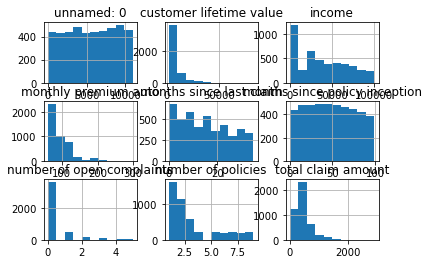

In [76]:
data.hist()
plt.show()

In [ ]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [77]:
X_num.corr()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
unnamed: 0,1.000000,0.018506,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315
customer lifetime value,0.018506,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
income,0.002476,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
monthly premium auto,-0.002327,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
months since last claim,-0.012626,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months since policy inception,0.016022,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number of open complaints,-0.007972,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number of policies,-0.004518,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
total claim amount,-0.008315,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [78]:
X_num = X_num.drop('months since policy inception', axis = 1)

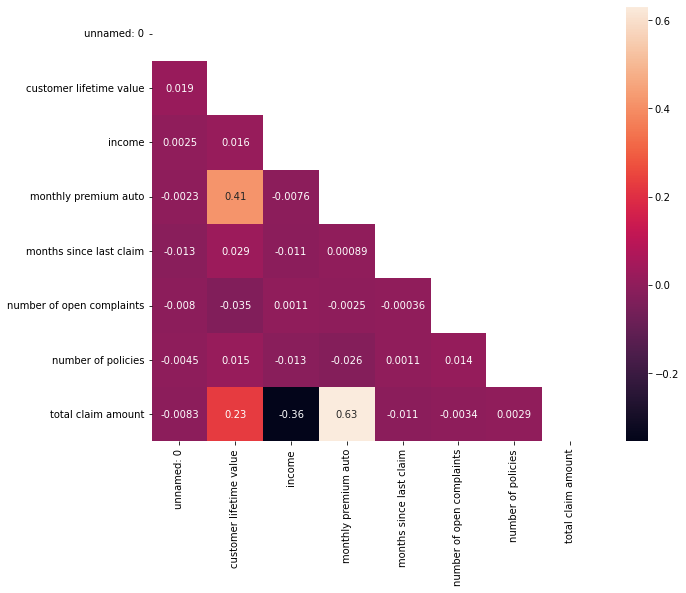

In [79]:
mask = np.zeros_like(X_num.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(X_num.corr(), mask=mask, annot=True)
plt.show()

In [ ]:
#X-y split.

In [80]:
y = X_num['customer lifetime value']
X = X_num.drop(['customer lifetime value'], axis=1)
X.head()

,unnamed: 0,income,monthly premium auto,months since last claim,number of open complaints,number of policies,total claim amount
2,2,22139,100,34.0,0.0,2,480.000000
3,3,49078,97,10.0,0.0,2,484.013411
10,10,82730,127,13.0,0.0,1,442.521087
13,13,66334,69,25.0,0.0,4,331.200000
16,16,76717,66,26.0,0.0,6,300.528579


In [ ]:
#Normalize (numerical)

In [81]:
transformer = MinMaxScaler().fit(X_num)
x_minmax = transformer.transform(X_num)
print(x_minmax.shape)

(4543, 8)


In [82]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,number of open complaints,number of policies,total claim amount
0,0.000000,0.160203,0.221476,0.164557,0.971429,0.0,0.125,0.165875
1,0.000092,0.250898,0.490971,0.151899,0.285714,0.0,0.125,0.167263
2,0.000734,0.039925,0.827623,0.278481,0.371429,0.0,0.000,0.152921
3,0.001009,0.043608,0.663599,0.033755,0.714286,0.0,0.375,0.114443
4,0.001284,0.042037,0.767469,0.021097,0.742857,0.0,0.625,0.103842


In [83]:
X_num_norm.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,number of open complaints,number of policies,total claim amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,0.507816,0.075284,0.374676,0.138284,0.431766,0.077262,0.247524,0.150832
std,0.288754,0.085475,0.302692,0.148075,0.290226,0.181511,0.298795,0.101975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264258,0.026223,0.000000,0.033755,0.171429,0.000000,0.000000,0.091799
50%,0.508619,0.048421,0.344684,0.092827,0.400000,0.000000,0.125000,0.132694
75%,0.759307,0.086373,0.615840,0.206751,0.657143,0.000000,0.375000,0.190762
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#One Hot/Label Encoding (categorical).

In [84]:
cat_encoded = pd.get_dummies(X_cat, drop_first=True)
cat_encoded.head()

,customer_AA11235,customer_AA16582,customer_AA35519,customer_AA56476,customer_AA69265,customer_AB31813,customer_AB60627,customer_AB62982,customer_AB73565,customer_AC13887,customer_AC24378,customer_AC67315,customer_AC73173,customer_AC79024,customer_AD12500,customer_AD18174,customer_AD28349,customer_AD33971,customer_AD56037,customer_AD71478,customer_AD95939,customer_AE62631,customer_AE74442,customer_AE89300,customer_AE93522,customer_AF36894,customer_AF37776,customer_AF47139,customer_AF48816,customer_AF69537,customer_AF81450,customer_AG39150,customer_AG45299,customer_AG56998,customer_AG85127,customer_AH22694,customer_AH39293,customer_AH41449,customer_AH97088,customer_AI14767,customer_AI16519,customer_AI49712,customer_AI58313,customer_AI61368,customer_AI74959,customer_AI85843,customer_AJ32539,customer_AJ69778,customer_AJ89108,customer_AK11669,customer_AK17025,customer_AK44985,customer_AK46006,customer_AK59340,customer_AK61491,customer_AK72422,customer_AL43715,customer_AL95338,customer_AM17304,customer_AM26598,customer_AM26717,customer_AM28777,customer_AM30008,customer_AM36670,customer_AM52614,customer_AM53473,customer_AM72411,customer_AM89558,customer_AM94127,customer_AM97901,customer_AM99192,customer_AN21193,customer_AN47199,customer_AN53225,customer_AN57220,customer_AO20938,customer_AO42003,customer_AO87348,customer_AP23850,customer_AP27994,customer_AP34711,customer_AP46166,customer_AP52126,customer_AP52565,customer_AP66226,customer_AP67935,customer_AP95078,customer_AQ11656,customer_AQ25590,customer_AQ34238,customer_AQ46199,customer_AQ51368,customer_AQ52711,customer_AQ91207,customer_AQ94108,customer_AR17553,customer_AR25213,customer_AR40217,customer_AR63478,customer_AR99766,customer_AS17174,customer_AS48176,customer_AS60178,customer_AS77287,customer_AS78838,customer_AS93181,customer_AS97690,customer_AT24793,customer_AT29024,customer_AT30076,customer_AT31367,customer_AT33529,customer_AT41276,customer_AT84725,customer_AT86990,customer_AU46443,customer_AU46604,customer_AU62013,customer_AU75025,customer_AU98438,customer_AV72430,customer_AV93209,customer_AW18068,customer_AW27717,customer_AW77988,customer_AW86033,customer_AX10148,customer_AX36597,customer_AX38728,customer_AX70794,customer_AX71707,customer_AX86150,customer_AX86552,customer_AY19539,customer_AY30324,customer_AY35050,customer_AY40674,customer_AY55759,customer_AY59197,customer_AY88788,customer_AY99324,customer_AZ29426,customer_AZ36763,customer_AZ50087,customer_AZ62651,customer_AZ64856,customer_AZ68072,customer_AZ68184,customer_AZ74055,customer_AZ77669,customer_AZ82578,customer_AZ84403,customer_AZ87715,customer_AZ95587,customer_BA17836,customer_BA19651,customer_BA38428,customer_BA56812,customer_BA66627,customer_BA75404,customer_BA87216,customer_BA97018,customer_BB19609,customer_BB21794,customer_BB48165,customer_BC31913,customer_BC35753,customer_BC47264,customer_BC48076,customer_BC51708,customer_BC52397,customer_BC53363,customer_BC62782,customer_BC66536,customer_BC75105,customer_BC77846,customer_BC85847,customer_BC86800,customer_BC87551,customer_BD13927,customer_BD16530,customer_BD35676,customer_BD36887,customer_BD42101,customer_BD66455,customer_BD69478,customer_BD77090,customer_BE10809,customer_BE33446,customer_BE55425,customer_BE62503,customer_BE75190,customer_BE92692,customer_BF45697,customer_BF54215,customer_BF55854,customer_BF69918,customer_BF72793,customer_BG30513,customer_BG42047,customer_BG48083,customer_BG55927,customer_BG74433,customer_BG76355,customer_BG85305,customer_BH11344,customer_BH28530,customer_BH35016,customer_BH36973,customer_BH43379,customer_BH61054,customer_BH61137,customer_BH86846,customer_BI34376,customer_BI76326,customer_BI81476,customer_BJ53923,customer_BJ58596,customer_BJ65040,customer_BK15048,customer_BK57087,customer_BK73302,customer_BK76107,customer_BK76340,customer_BK83393,customer_BL12371,customer_BL29046,customer_BL29240,customer_BL42392,customer_BL55947,customer_BL89983,customer_BL93527,customer_BL93659,customer_BM16805,customer_BM21532,cust

In [ ]:
#Concat DataFrames

In [85]:
together = pd.concat([X_num, cat_encoded], axis=1)

In [86]:
together

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,number of open complaints,number of policies,total claim amount,customer_AA11235,customer_AA16582,customer_AA35519,customer_AA56476,customer_AA69265,customer_AB31813,customer_AB60627,customer_AB62982,customer_AB73565,customer_AC13887,customer_AC24378,customer_AC67315,customer_AC73173,customer_AC79024,customer_AD12500,customer_AD18174,customer_AD28349,customer_AD33971,customer_AD56037,customer_AD71478,customer_AD95939,customer_AE62631,customer_AE74442,customer_AE89300,customer_AE93522,customer_AF36894,customer_AF37776,customer_AF47139,customer_AF48816,customer_AF69537,customer_AF81450,customer_AG39150,customer_AG45299,customer_AG56998,customer_AG85127,customer_AH22694,customer_AH39293,customer_AH41449,customer_AH97088,customer_AI14767,customer_AI16519,customer_AI49712,customer_AI58313,customer_AI61368,customer_AI74959,customer_AI85843,customer_AJ32539,customer_AJ69778,customer_AJ89108,customer_AK11669,customer_AK17025,customer_AK44985,customer_AK46006,customer_AK59340,customer_AK61491,customer_AK72422,customer_AL43715,customer_AL95338,customer_AM17304,customer_AM26598,customer_AM26717,customer_AM28777,customer_AM30008,customer_AM36670,customer_AM52614,customer_AM53473,customer_AM72411,customer_AM89558,customer_AM94127,customer_AM97901,customer_AM99192,customer_AN21193,customer_AN47199,customer_AN53225,customer_AN57220,customer_AO20938,customer_AO42003,customer_AO87348,customer_AP23850,customer_AP27994,customer_AP34711,customer_AP46166,customer_AP52126,customer_AP52565,customer_AP66226,customer_AP67935,customer_AP95078,customer_AQ11656,customer_AQ25590,customer_AQ34238,customer_AQ46199,customer_AQ51368,customer_AQ52711,customer_AQ91207,customer_AQ94108,customer_AR17553,customer_AR25213,customer_AR40217,customer_AR63478,customer_AR99766,customer_AS17174,customer_AS48176,customer_AS60178,customer_AS77287,customer_AS78838,customer_AS93181,customer_AS97690,customer_AT24793,customer_AT29024,customer_AT30076,customer_AT31367,customer_AT33529,customer_AT41276,customer_AT84725,customer_AT86990,customer_AU46443,customer_AU46604,customer_AU62013,customer_AU75025,customer_AU98438,customer_AV72430,customer_AV93209,customer_AW18068,customer_AW27717,customer_AW77988,customer_AW86033,customer_AX10148,customer_AX36597,customer_AX38728,customer_AX70794,customer_AX71707,customer_AX86150,customer_AX86552,customer_AY19539,customer_AY30324,customer_AY35050,customer_AY40674,customer_AY55759,customer_AY59197,customer_AY88788,customer_AY99324,customer_AZ29426,customer_AZ36763,customer_AZ50087,customer_AZ62651,customer_AZ64856,customer_AZ68072,customer_AZ68184,customer_AZ74055,customer_AZ77669,customer_AZ82578,customer_AZ84403,customer_AZ87715,customer_AZ95587,customer_BA17836,customer_BA19651,customer_BA38428,customer_BA56812,customer_BA66627,customer_BA75404,customer_BA87216,customer_BA97018,customer_BB19609,customer_BB21794,customer_BB48165,customer_BC31913,customer_BC35753,customer_BC47264,customer_BC48076,customer_BC51708,customer_BC52397,customer_BC53363,customer_BC62782,customer_BC66536,customer_BC75105,customer_BC77846,customer_BC85847,customer_BC86800,customer_BC87551,customer_BD13927,customer_BD16530,customer_BD35676,customer_BD36887,customer_BD42101,customer_BD66455,customer_BD69478,customer_BD77090,customer_BE10809,customer_BE33446,customer_BE55425,customer_BE62503,customer_BE75190,customer_BE92692,customer_BF45697,customer_BF54215,customer_BF55854,customer_BF69918,customer_BF72793,customer_BG30513,customer_BG42047,customer_BG48083,customer_BG55927,customer_BG74433,customer_BG76355,customer_BG85305,customer_BH11344,customer_BH28530,customer_BH35016,customer_BH36973,customer_BH43379,customer_BH61054,customer_BH61137,customer_BH86846,customer_BI34376,customer_BI76326,customer_BI81476,customer_BJ53923,customer_BJ58596,customer_BJ65040,customer_BK15048,customer_BK57087,customer_BK73302,customer_BK76107,customer_BK76340,customer_BK83393,customer_BL12371,custom

In [ ]:
#Train-test split.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Apply linear regression.

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit( X_train, y_train)

LinearRegression()

In [89]:
len(X_train)

3180

In [90]:
len(X_test)

1363

In [91]:
predictions = model.predict(X_test)
predictions

array([7892.91963513, 5160.35773497, 6456.45231622, ..., 7415.15117714,
       6406.83325578, 9309.19679434])

In [57]:
#Description

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.13686822080623418
RMSE =  5541.782254394367
MSE =  30711350.55512031
MAE =  3629.8943062769545
